In [80]:
import pandas as pd
import os 
from datetime import datetime
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [81]:
# Files to load
Battery1  = os.path.join(r"C:\Users\racha\Desktop\TESLA CSV\001.csv")
Battery1_df=pd.read_csv(Battery1)
Battery1_df

,battery_serial,timestamp,signal_name,signal_value
0,1,1503878340000,PW_FullPackEnergyAvailable,6448
1,1,1503878370000,PW_EnergyRemaining,2721
2,1,1503878400000,PW_AvailableChargePower,3300
3,1,1503878640000,PW_FullPackEnergyAvailable,6448
4,1,1503878670000,PW_EnergyRemaining,2679
...,...,...,...,...
35863,1,1514559270000,PW_EnergyRemaining,472
35864,1,1514559300000,PW_AvailableChargePower,3300
35865,1,1514559540000,PW_FullPackEnergyAvailable,6386
35866,1,1514559570000,PW_EnergyRemaining,472


In [82]:
Battery1_df.timestamp=pd.to_datetime(Battery1_df['timestamp'] ,unit='ms')
Battery1_df

,battery_serial,timestamp,signal_name,signal_value
0,1,2017-08-27 23:59:00,PW_FullPackEnergyAvailable,6448
1,1,2017-08-27 23:59:30,PW_EnergyRemaining,2721
2,1,2017-08-28 00:00:00,PW_AvailableChargePower,3300
3,1,2017-08-28 00:04:00,PW_FullPackEnergyAvailable,6448
4,1,2017-08-28 00:04:30,PW_EnergyRemaining,2679
...,...,...,...,...
35863,1,2017-12-29 14:54:30,PW_EnergyRemaining,472
35864,1,2017-12-29 14:55:00,PW_AvailableChargePower,3300
35865,1,2017-12-29 14:59:00,PW_FullPackEnergyAvailable,6386
35866,1,2017-12-29 14:59:30,PW_EnergyRemaining,472


In [83]:
# Determine if there are any missing values 
Battery1_df.count()

battery_serial    35868
timestamp         35868
signal_name       35868
signal_value      35868
dtype: int64

In [84]:
grouped = Battery1_df.groupby(Battery1_df.signal_name) 
Battery1_df_new = grouped.get_group("PW_AvailableChargePower") 
Battery1_df_new

,battery_serial,timestamp,signal_name,signal_value
2,1,2017-08-28 00:00:00,PW_AvailableChargePower,3300
5,1,2017-08-28 00:05:00,PW_AvailableChargePower,3300
8,1,2017-08-28 00:10:00,PW_AvailableChargePower,3300
11,1,2017-08-28 00:15:00,PW_AvailableChargePower,3300
14,1,2017-08-28 00:20:00,PW_AvailableChargePower,3300
...,...,...,...,...
35855,1,2017-12-29 14:40:00,PW_AvailableChargePower,3300
35858,1,2017-12-29 14:45:00,PW_AvailableChargePower,3300
35861,1,2017-12-29 14:50:00,PW_AvailableChargePower,3300
35864,1,2017-12-29 14:55:00,PW_AvailableChargePower,3300


In [67]:
# selecting rows based on condition  
sig_value = Battery1_df_new['signal_value'] >= 3300
Battery1_df_new1=Battery1_df_new[sig_value]
print(Battery1_df_new1)


       battery_serial           timestamp              signal_name  \
2                   1 2017-08-28 00:00:00  PW_AvailableChargePower   
5                   1 2017-08-28 00:05:00  PW_AvailableChargePower   
8                   1 2017-08-28 00:10:00  PW_AvailableChargePower   
11                  1 2017-08-28 00:15:00  PW_AvailableChargePower   
14                  1 2017-08-28 00:20:00  PW_AvailableChargePower   
...               ...                 ...                      ...   
35855               1 2017-12-29 14:40:00  PW_AvailableChargePower   
35858               1 2017-12-29 14:45:00  PW_AvailableChargePower   
35861               1 2017-12-29 14:50:00  PW_AvailableChargePower   
35864               1 2017-12-29 14:55:00  PW_AvailableChargePower   
35867               1 2017-12-29 15:00:00  PW_AvailableChargePower   

       signal_value  
2              3300  
5              3300  
8              3300  
11             3300  
14             3300  
...             ...  
35855

<AxesSubplot:>

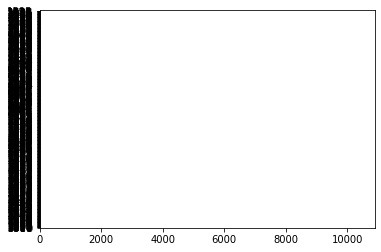

In [87]:
Battery1_df_new.signal_value.value_counts().plot(kind='barh')

<AxesSubplot:ylabel='signal_value'>

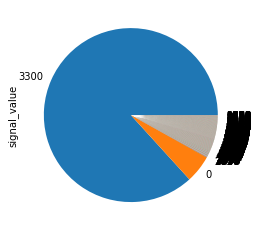

In [88]:
Battery1_df_new.signal_value.value_counts().plot(kind='pie')